# Bayesian analysis in R


## Description of the data
The data [Empirical-Software-Engineering](W. Afzal, A. N. Ghazi, J. Itkonen,
R. Torkar, A. Andrews, and K. Bhatti.
An experiment on the effectiveness
and efficiency of exploratory testing.
Empirical Software Engineering, 20(3):
844–878, 2015. ISSN 1573-7616. doi:
10.1007/s10664-014-9301-4 "Empirical Software Engineering") is from an experiment where 70 subjects participated. Of the 70, 46 subjects were categorized as less experienced (LE) and 24 were categorized as more experienced (ME). The experiment evaluated two software testing techniques, i.e., a new technique (NT) and an old technique (OT), used a small, noncritical system as the software under test, and had a 2 × 2 design to avoid learning bias. The effectiveness of each technique was measured through true positives (tp).

In [2]:
library(rethinking)
d <- read.csv("https://raw.githubusercontent.com/torkar/dat321/master/data_autumn2020.csv", sep=";") # nolint
head(d)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




,subject,category,technique,tp
,<int>,<chr>,<chr>,<int>
1,1,LE,NT,5
2,1,LE,OT,6
3,2,LE,NT,3
4,2,LE,OT,3
5,3,LE,NT,7
6,3,LE,OT,3


## Descriptive statistics
First, I check the tp column I checked min, max, plot, density I saw
that everything was normal then I checked the category, I checked 2 Descriptive statistics
freq with library "summarytools" and I saw that everything fine then
I checked the last column and I saw weird things "0T" so that is an
error and I replace the "0T" to "OT".then I checked that every subject
has two rows in our data with "count" Function. the variables we’ll
need: in this assignment, I check Three likelihood one of them count
base and the others real number base, so I have two data lists that
one of I’ve standardized the outcome and in both data lists, tech
is 1 for new technique and 2 for old technique and cat is 1 for less
experience and 2 for more experience. 

,subject,category,technique,tp
,<int>,<chr>,<chr>,<int>
1,1,LE,NT,5
2,1,LE,OT,6
3,2,LE,NT,3
4,2,LE,OT,3
5,3,LE,NT,7
6,3,LE,OT,3


'data.frame':	140 obs. of  4 variables:
 $ subject  : int  1 1 2 2 3 3 4 4 5 5 ...
 $ category : chr  "LE" "LE" "LE" "LE" ...
 $ technique: chr  "NT" "OT" "NT" "OT" ...
 $ tp       : int  5 6 3 3 7 3 6 4 11 5 ...


[1] 1

[1] 11

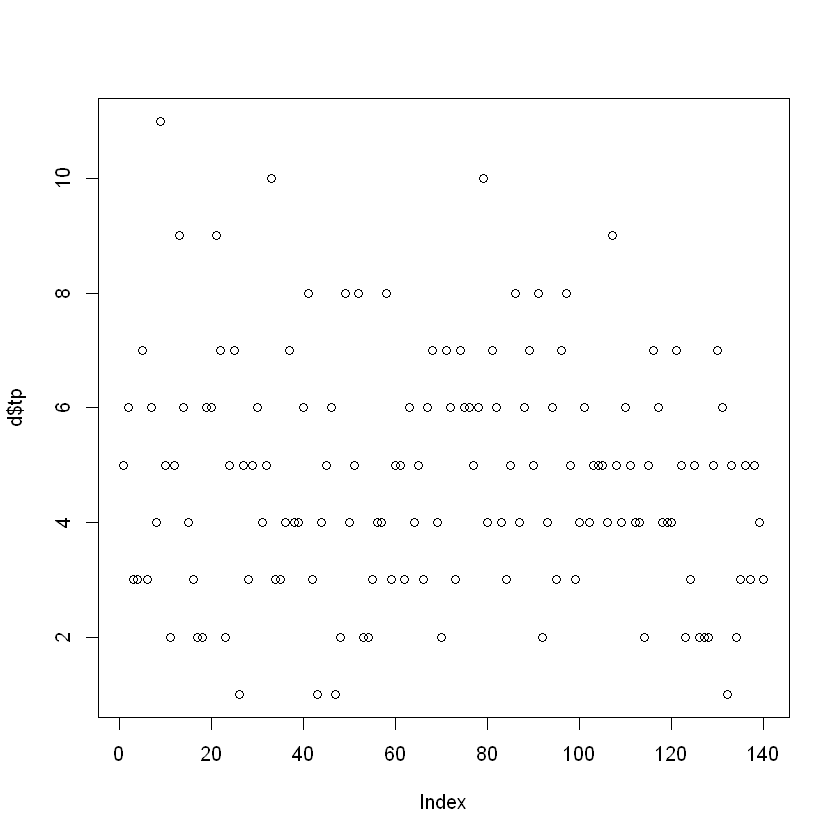

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
LE,92,65.71429,65.71429,65.71429,65.71429
ME,48,34.28571,100.00000,34.28571,100.00000
<NA>,0,NA,NA,0.00000,100.00000
Total,140,100.00000,100.00000,100.00000,100.00000


[1] "0T"

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
0T,1,0.7142857,0.7142857,0.7142857,0.7142857
NT,70,50.0000000,50.7142857,50.0000000,50.7142857
OT,69,49.2857143,100.0000000,49.2857143,100.0000000
<NA>,0,NA,NA,0.0000000,100.0000000
Total,140,100.0000000,100.0000000,100.0000000,100.0000000


subject,freq
<int>,<int>
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


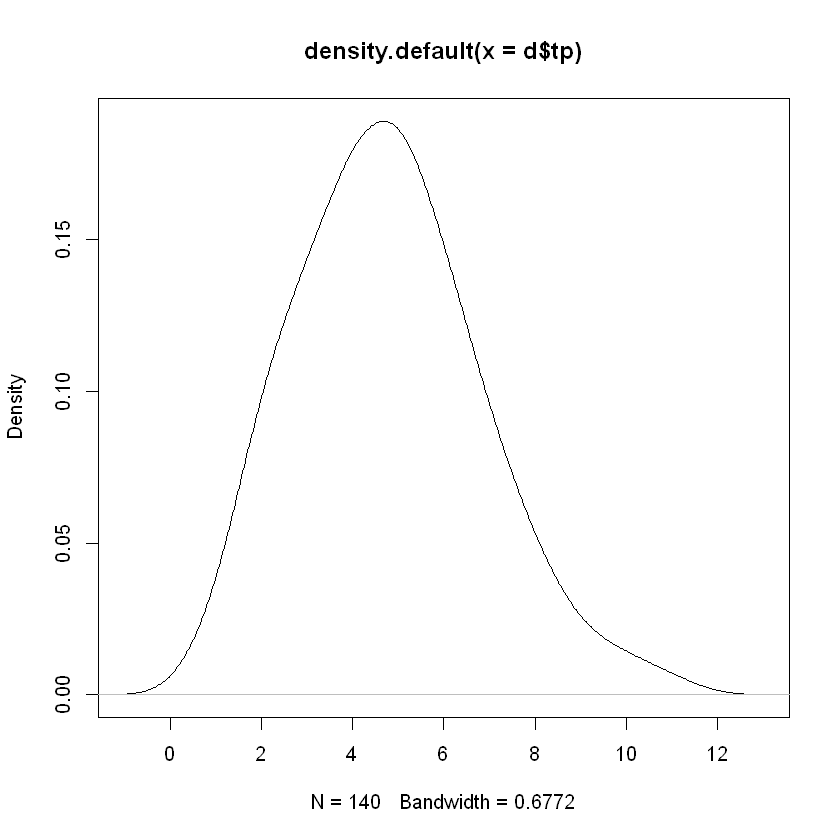

In [4]:
#_____________Descriptive statistics_________
head(d)
str(d)

#First check tp
min(d$tp)
max(d$tp)
plot(d$tp)
plot(density(d$tp))

#Second Check category
library(summarytools)
freq(d$category)

#third check technique
#______________Find Something________________
min(d$technique) #  "0T" !!
library(summarytools)
freq(d$technique) #find three categury !!

library(plyr)
count(d, "subject")


In [3]:
d$technique[d$technique == "0T"] <- "OT" 

dat_list <- list(
    tp = standardize(d$tp),
    T = ifelse(d$technique == "NT", 1L, 2L),
    C = ifelse(d$category == "LE", 1L, 2L)
)

dat_list2 <- list(
    tp = d$tp,
    T = ifelse(d$technique == "NT", 1L, 2L),
    C = ifelse(d$category == "LE", 1L, 2L)
)


## Models
### likelihood(s)
I have two options for choosing likelihood one of them going base real number the other one going base count number and I want to compare these two models and show that "Is it good to standardize and convert discrete numbers to  Real numbers or not?" so for count base number I have Two options one of them is binomial and the other one is Poisson and because we have a low rate for Score so I choose Poisson and in Poisson I have two other options one of them Standard Poisson and the other one Gama Poisson at first I check mean and variance of tp 4 and I saw that there is a little difference so There should not be much difference between the two likelihoods So I choose Poisson for Three reasons:
1. Count Events With Low rate 
2. Mean and Variance are almost equal 
3. we don’t have many trials so adding parameters Probably not a good idea

Eventually, I became curious to check Gama-Poisson too.

### Priors
To define prior I need to find mean, min, max of data for both desecrate number data and real number data so at first, I calculate them. I have 6 models:

In [7]:
mean(dat_list$tp)
min(dat_list$tp)
max(dat_list$tp)
mean(dat_list2$tp)
min(dat_list2$tp)
max(dat_list2$tp)


[1] 6.141386e-17

[1] -1.868999

[1] 3.077312

[1] 4.778571

[1] 1

[1] 11

### M1:
at first, I check the data that see that we can have negative and
positive so at first, I put zero for normal model a and the same
for bT and bC but for variance, I check some numbers to get the
best result for the first I check 1 but I know that the mean so near
to zero so this number should be near to zero but I just want to
check and get experience and for both bT and bC I know that this
is slope and C and T they can just take two number of 1,2 because
of mean the bT and bC obviously that must be less than 1 then I
create my model I check n_eff and Rhat, the Rhat shows 1 so I’m
in a good way but But the situation of n_eff is not very good its
less than the 1000 and so far to 2000 for 4 chains. I tried different
numbers and finally, I got to this model (you can see my tries and
precis of each number)

In [3]:
m1 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- a + bT * T + bC * C,
    a ~ dnorm(0, 0.2),
    c(bT, bC) ~ dnorm(0, 0.5),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 4, cores = 1, log_lik = TRUE
)


SAMPLING FOR MODEL 'f2bedb0a0b842f9bd3910a1e624c98a9' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.203 seconds (Warm-up)
Chain 1:                0.123 seconds (Sampling)
Chain 1:                0.

### M2:
m2 is the same as m1 Being as the likelihood is the same but it is an iteration model

In [4]:
m2 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- bt[T] + bc[C],
    bt[T] ~ dnorm(0, 0.05),
    bc[C] ~ dnorm(0, 0.05),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 4, cores = 1, log_lik = TRUE)


SAMPLING FOR MODEL '5e0d2402cb8453f2def0cff7bb6c8ba2' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.049 seconds (Warm-up)
Chain 1:                0.044 seconds (Sampling)
Chain 1:                0.

### M3:
I use Poisson so first I check to mean, min, max and then calculate the log of them and because of Poisson use discrete outcome so I use dat_list$tp so the result is 1.5 as mean, 0 as min and 2.4 as max so for log(lambda) I set 1.5 as a centre and 1.5 as variance too so now it is cover all number


In [5]:
m3 <- ulam(
  alist(
    tp ~ dpois(lambda),
    log(lambda) <- a,
    a ~ dnorm(1.5, 1.5)
  ), data = dat_list2, chains = 4,  cores = 1, iter = 2000, log_lik = TRUE
)



SAMPLING FOR MODEL '05a05b014e110ed6b2f4d44e2f7c12a5' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.086 seconds (Warm-up)
Chain 1:                0.152 seconds (Sampling)
Chain 1:       

### M4:
I just add more parameters and the prior for alpha is the same and for bt and bc, I know that T and C can get 1 and 2 and we need to negative them Considering that sometimes alpha maybe more and we need to Decrease it so I centre it with 0 but it should be less than 1 so we need a number less than .5 (because of 2) so I put 0.2(actually I test .5 and .4) but I get better result of 0.2

In [6]:
m4 <- ulam(
  alist(
    tp ~ dpois(lambda),
    log(lambda) <- a + bt[T]+bc[C],
    a ~ dnorm(1.5, 1.5),
    bt[T] ~ dnorm( 0, 0.2 ),
    bc[C] ~ dnorm( 0, 0.2 )
  ), data = dat_list2, chains = 4, cores=1 ,iter = 2000, log_lik = TRUE
)


SAMPLING FOR MODEL '4c13148f85a054f5ee441b6d59453c7f' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.04 seconds (Warm-up)
Chain 1:                0.964 seconds (Sampling)
Chain 1:        

### M6:
I use Gama-Poisson in this model, all priors are the same as Poisson(M3) Thanks to the link function is the same and I use the same parameters.


In [9]:
m6 <- ulam(
  alist(
    tp ~ dgampois( lambda , phi ),
    log(lambda) <- a + bt[T]+bc[C],
    a ~ dnorm(1.5,.5),
    bt[T] ~ dnorm( 0 , 0.2 ),
    bc[C] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=4,cmdstan = TRUE ,iter = 2000 , log_lik=TRUE )



This is cmdstanr version 0.4.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- CmdStan path set to: C:/Users/sinad/OneDrive/Documents/.cmdstan/cmdstan-2.27.0

- Use set_cmdstan_path() to change the path


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.



Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-20982def3f05.stan', line 22, column 4 to column 40)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-20982def3f05.stan', line 22, column 4 to column 40)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-20982def3f05.stan', line 22, column 4 to column 40)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-20982def3f05.stan', line 22, column 4 to column 40)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  

### M5,M7,M8:
these models created by just experience or technique to see that how much these variables effect, I explain that in further


for all models i check prior and posterior predictive check and check
Max and min values(plot is located at prior predictive check).

In [1]:
m5 <- ulam(
  alist(
    tp ~ dnorm(mu, sigma),
    mu <- bt[T]  ,
    bt[T] ~ dnorm(0, 0.05),
    sigma ~ dexp(1)
  ), data = dat_list, chains = 1, cores = 4, log_lik = TRUE)

ERROR: Error in ulam(alist(tp ~ dnorm(mu, sigma), mu <- bt[T], bt[T] ~ dnorm(0, : could not find function "ulam"


In [12]:
m7 <- ulam(
  alist(
    T ~ dgampois( lambda , phi ),
    log(lambda) <- a + bt[T],
    a ~ dnorm(1.5, .5),
    bt[T] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=1,iter = 2000,
  cmdstan = TRUE , log_lik=TRUE )

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[1] is 0, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-2098592d3c0b.stan', line 20, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[1] is 0, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-2098592d3c0b.stan', line 20, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-2098592d3c0b.stan', line 20, column 4 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in 'C:/Users/sinad/AppData/Local/Temp/Rtmpe4DsYY/model-2098592d3c0b.stan', line 20, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  

In [4]:
m8 <- ulam(
  alist(
    T ~ dgampois( lambda , phi ),
    log(lambda) <- a + bc[C],
    a ~ dnorm(1.5, .5),
    bc[C] ~ dnorm( 0 , 0.2 ),
    phi ~ dexp(1)
  ), data=dat_list2 ,cores=4, chains=1,iter = 2000,
  cmdstan = TRUE , log_lik=TRUE )

This is cmdstanr version 0.4.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- CmdStan path set to: C:/Users/sinad/OneDrive/Documents/.cmdstan/cmdstan-2.27.0

- Use set_cmdstan_path() to change the path


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.



Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

## Compare
I write the compare code with 4 models and the result shows that
the m2(interaction Normal model) is better than m1(Normal model)
and m1 is better than m4(interaction Poisson model) and m4 is better than m3(Standard Poisson model) (because in WAIC The lower
WAIC is the better Model ) I checked to compare with the LOO
function but I didn’t see anything change and everything is the
same approximately.

In [7]:
compare(m1, m2,m3,m4, func = WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m2,398.1939,16.85586,0.000000,NA,1.5770888,7.442807e-01
m1,400.3306,16.81607,2.136676,0.9534032,2.9066005,2.557193e-01
m4,590.7689,12.43417,192.574933,6.6838993,2.2878677,1.134022e-42
m3,591.5131,13.36030,193.319135,4.7229913,0.8399014,7.816639e-43


In [8]:
compare(m1, m2,m3,m4, func = LOO)

,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m2,398.2014,16.91787,0.000000,NA,1.5808305,7.455901e-01
m1,400.3519,16.87908,2.150458,0.9539637,2.9172333,2.544099e-01
m4,590.7783,12.47992,192.576915,6.6843565,2.2926006,1.134892e-42
m3,591.5149,13.40844,193.313468,4.7242576,0.8408096,7.852610e-43


### Dags
for dags first, I use daggity site and design my path 13 then I use both libraries ("dagitty", "ggdag") and write code to display dags.


Attaching package: 'ggdag'


The following object is masked from 'package:stats':

    filter




# A DAG with 3 nodes and 2 edges
#
# Exposure: C, T
# Outcome: TP
#
# A tibble: 3 x 8
  name      x     y direction to     xend  yend circular
  <chr> <dbl> <dbl> <fct>     <chr> <dbl> <dbl> <lgl>   
1 C      29.0  24.9 ->        TP     27.8  24.9 FALSE   
2 T      26.7  24.9 ->        TP     27.8  24.9 FALSE   
3 TP     27.8  24.9 NA        NA     NA    NA   FALSE   

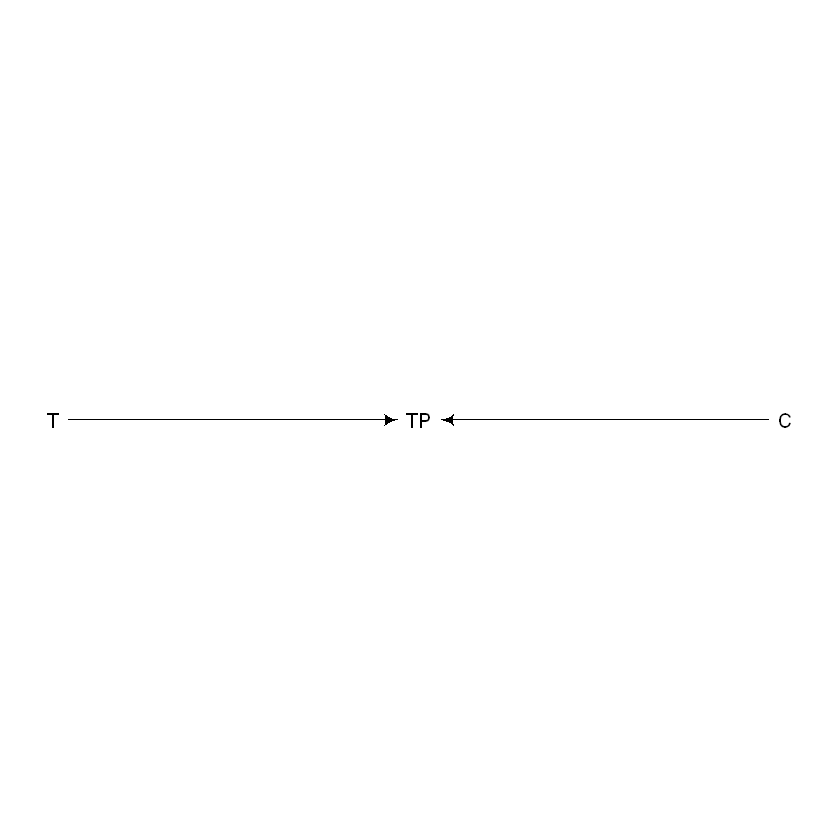

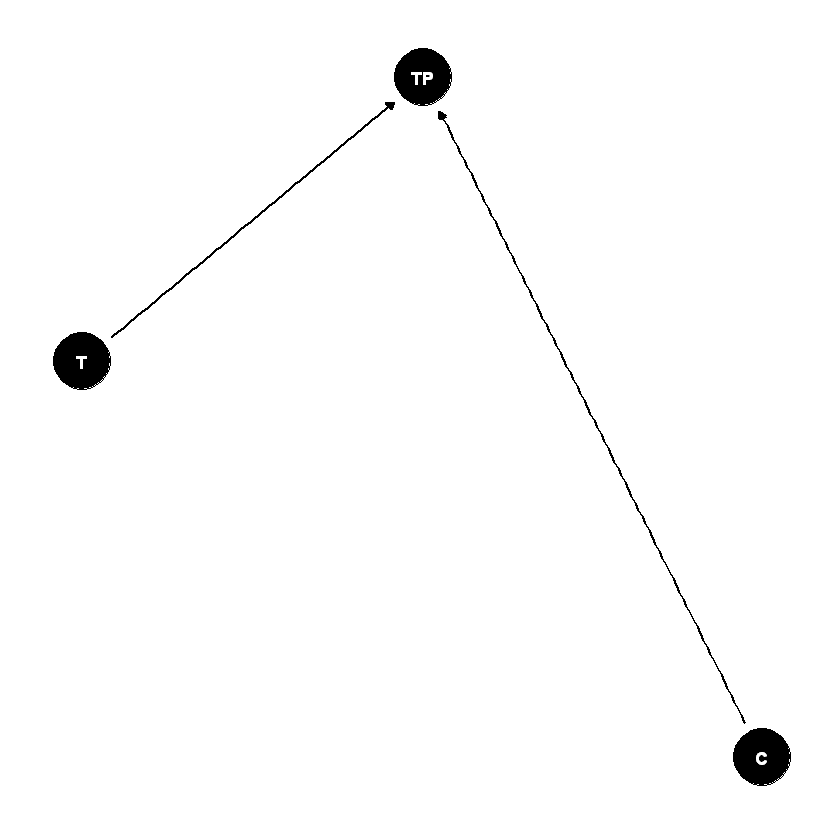

In [13]:
library(dagitty)
dag <- dagitty("dag{ T -> TP; C -> TP; }")
coordinates(dag) <- list(x = c(T = 0, TP = 1, C = 2), y = c(T = 0, TP = 0, C = 0)) # nolint
drawdag(dag)


library(ggdag)
dag <- dagitty::dagitty("dag {
    T -> TP <- C
    C [exposure]
    T [exposure]
    TP [outcome]
  }")

tidy_dag <- tidy_dagitty(dag)

tidy_dag

ggdag(tidy_dag) +
    theme_dag()

## My final model 
base WAIC  is M2
I check Rhat and n_eff for all models and check
them when I change priors or iteration numbers but for specific M2

### Rhat
Rhat is 1 Rhat (R^) is an indicator of the convergence of the Markov
chains to the target distribution. It should approach 1.00 from above
when all is well.

### Sample Size
n_eff for all parameters are more than 2000.n_eff is a crude estimate
of the number of independent samples you managed to get and for
chain 4 and default iteration if n_eff is more than 2000 is the best but
for m6 with 3 parameters and the iteration is 2000 so more than 1000
is the best.

In [8]:
precis(m2, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bt[1],0.02374336,0.04646848,-0.05094588,0.09812025,2244.290,1.0000366
bt[2],-0.02198999,0.04518907,-0.09380512,0.04812063,2860.498,0.9994639
bc[1],0.01505677,0.04500376,-0.05601938,0.08965454,3692.935,0.9992011
bc[2],-0.01510702,0.04700806,-0.09214449,0.05746566,3141.373,0.9988087
sigma,0.99906535,0.05900107,0.90722459,1.09490580,2814.259,0.9998571


### Traceplot
Typically we look for three things in these traceplots: chain 1
- Stationarity: for all parameters mean and variance do not change
over time so each chain staying within the same high-probability
portion
- good mixing:rapidly zig-zags around so it is a good Hamiltonian
chain
- convergence:it seems that independent chains stick around the
same region of high probability

[1] 1000
[1] 1
[1] 1000


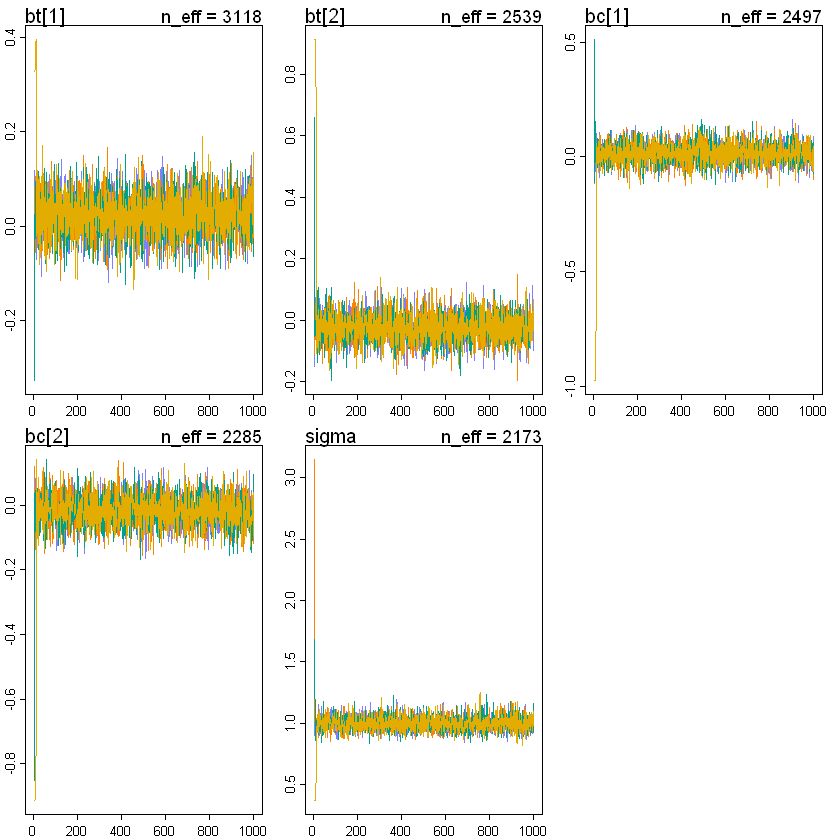

In [5]:
traceplot(m2)

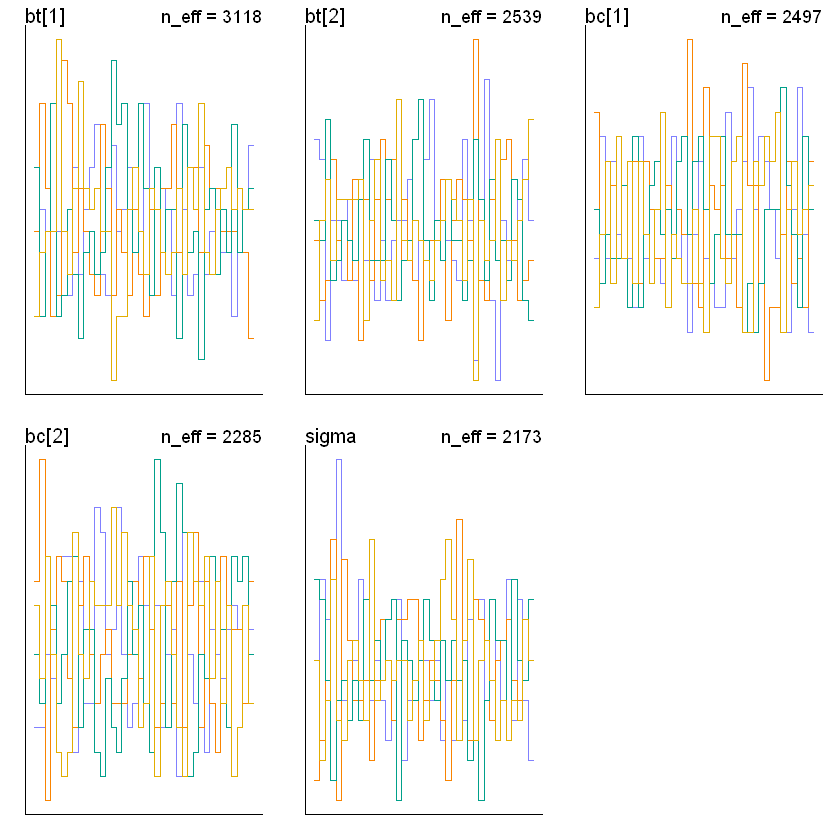

In [6]:
trankplot(m2)

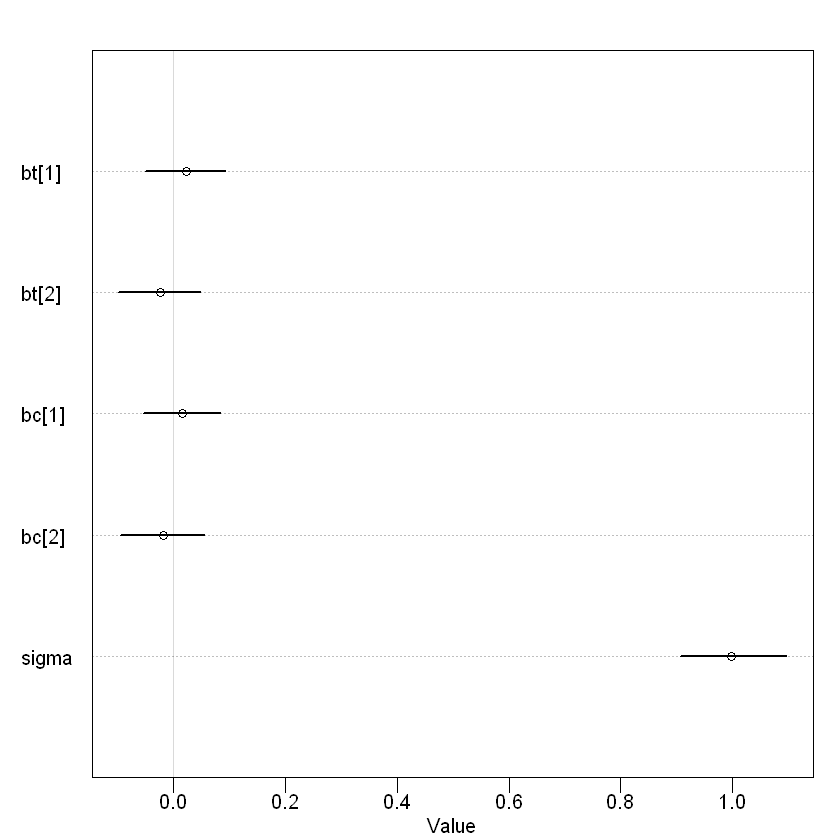

In [7]:
precis_plot(precis(m2, 2))

Prior Predictive check (for m6 gamma poisson)
First get sample from prior (extract.prior) then we need to convert the parameter to the outcome scale this means using the inverse
link function in our model link function is log so the inverse link is exp.I’ve displayed the resulting prior distribution , Notice
that most of the probability mass is piled up near 1 and 12, Almost
like the original data so we don’t have outliers.


SAMPLING FOR MODEL '693eefa4a37dcc040d60699bd5ab6cf9' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.225 seconds (Warm-up)
Chain 1:                0.171 seconds (Sampling)
Chain 1:       

ERROR: Error in rbind(visual1, visual2): object 'visual1' not found


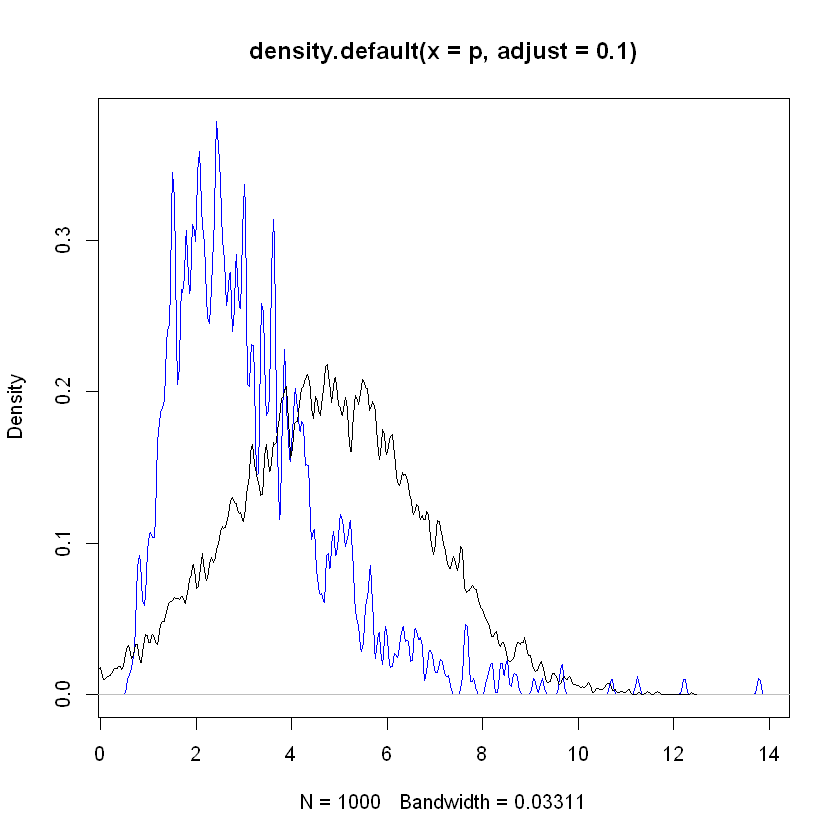

In [10]:
#Prior Data
prior_m6 <- extract.prior(m6)
p <- exp(  prior_m6$a+prior_m6$bt[1]+prior_m6$bc[1] )
plot(density(p, adj=0.1),col="blue")
#Real Data
Real <- rnorm( 1e4 , 4.778571 , 2.021709 )
lines(density(Real,adj=0.1))

visual12 <- rbind(visual1, visual2)

### Technique
- Diff Sim:20I create M7 model from my final model in that model I
just use the technique and my result shows that "T2(old technique)
is better 544 times, T1(New technique) is better 230 times and they
have a draw 226 times T2(old technique) is better 54.4% of the
time" but when I check with other models like Normal or Poisson
my result shows that New technique is better.But I trust Gamma-Poisson, which is my Final model and i say OT is better.
- Diff Posterior: when I use diff in the posterior model I get
positive mean it means that the Old technique is better than the
New technique but it is not so significant you can see it in the
figure all shapes of the techniques approximately is the same.

In [11]:
post <- extract.samples(m6)
diff_T <- post$bt[,2] - post$bt[,1]
precis(diff_T,depth=2)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
diff_T,-0.1153396,0.08557394,-0.2537764,0.01958523,<U+2581><U+2581><U+2581><U+2581><U+2583><U+2585><U+2587><U+2587><U+2583><U+2582><U+2581><U+2581><U+2581><U+2581>


In [13]:
post <- extract.samples(m7)
post$diff_T <- post$bt[,2] - post$bt[,1]
precis(post,depth=2)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a,0.4674422,0.1496860,0.22421683,0.7025412,<U+2581><U+2581><U+2581><U+2582><U+2585><U+2587><U+2587><U+2583><U+2581><U+2581><U+2581>
bt[1],-0.3460221,0.1468449,-0.58035765,-0.1133540,<U+2581><U+2581><U+2583><U+2587><U+2587><U+2587><U+2583><U+2581><U+2581><U+2581><U+2581><U+2581>
bt[2],0.1829027,0.1470082,-0.04879321,0.4212393,<U+2581><U+2581><U+2581><U+2582><U+2585><U+2587><U+2587><U+2583><U+2582><U+2581><U+2581>
phi,10.3162320,2.3820108,6.88858010,14.3884735,<U+2581><U+2583><U+2587><U+2587><U+2583><U+2581><U+2581><U+2581><U+2581><U+2581>
diff_T,0.5289248,0.1301692,0.32045689,0.7361251,<U+2581><U+2581><U+2581><U+2582><U+2587><U+2587><U+2585><U+2582><U+2581><U+2581><U+2581>


In [5]:
post <- extract.samples(m8)
diff_C <- post$bc[,2] - post$bc[,1]
precis(diff_C,depth = 2)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
diff_C,0.006120154,0.1356292,-0.2165644,0.228858,<U+2581><U+2582><U+2583><U+2587><U+2587><U+2585><U+2582><U+2581><U+2581>


### Experience
when I use diff function for experiences and i use model that just have experience that gave me so little positive mean (0.01) so less experience is a little better i compare three models(with both M6,Just Technique M7,Just Experience M8) and I saw that if we don’t use Experience in our model our WAIC is nothing change and even is better so in my opinion experience doesn’t have any effect on our model.

In [ ]:
compare(m6,m7,m8)